# Salary Estimation Using KNN-Model

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load the Dataset from local Directory

In [2]:
df = pd.read_csv('OneDrive/Desktop/salary.csv')

# Summarize the Dataset

In [3]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [5]:
df.shape

(32561, 5)

In [6]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


# Mapping Salary Data to Binary Value

In [7]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(df.head())

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


# Segregating Dataset into X (input) & y (output) 

In [8]:
x = df.iloc[:, :-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [9]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 0, 0])

# Splitting Datasetv into Train & Test

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.25 , random_state = 0)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24420, 4)
(24420,)
(8141, 4)
(8141,)


# Feature Scalling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Finding the Best K-Value

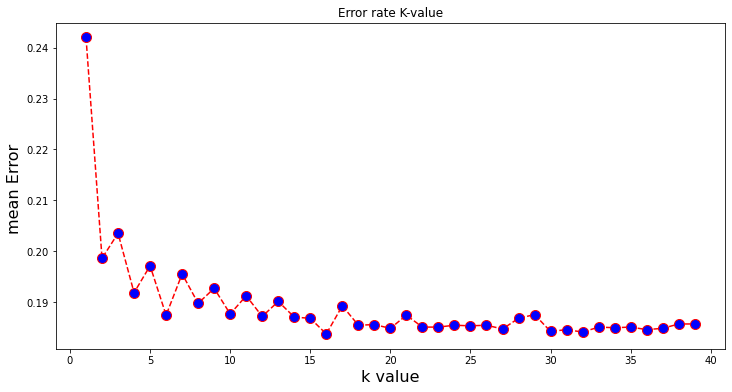

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (12,6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate K-value')
plt.xlabel('k value', fontsize = 16)
plt.ylabel('mean Error ', fontsize = 16)
plt.show()


# Training 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors = 2 , metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# Predecting 

In [17]:
age = int(input('Enter a new employee age: '))
edu = int(input('Enter a new employee education: '))
cg  = int(input('Enter a new employee Capital Gain: '))
wh = int(input('Enter a new employee hours per week: '))
newemp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))
print(result)


if result == 1:
    print('employee might got a salary >50k')
else:
    print('employee might not a salary <=50k')

Enter a new employee age: 25
Enter a new employee education: 10
Enter a new employee Capital Gain: 0
Enter a new employee hours per week: 40
[0]
employee might not a salary <=50k


# Prediction for all test data

In [20]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Evaluting Model Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print('confusion matrix:')
print(cm)

print('Accuracy of the model: {0}%'.format(accuracy_score(y_test, y_pred)*100))

confusion matrix:
[[5941  252]
 [1365  583]]
Accuracy of the model: 80.13757523645744%
